### Deep Reinfocement Learning - Evolution Strategies - Chapter 5

In [1]:
import random
from matplotlib import pyplot as plt

In [2]:
alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! "
target = "Hello World!"

In [3]:
class Individual:
    def __init__(self, string, fitness=0):
        self.string = string
        self.fitness = fitness

In [4]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [5]:
def spawn_population(length=26,size=100):
    pop = []
    for i in range(size):
        string = ''.join(random.choices(alphabet,k=length))
        individual = Individual(string)
        pop.append(individual)
    return pop

In [6]:
def mutate(x, mut_rate=0.01):
    new_x_ = []
    for char in x.string:
        if random.random() < mut_rate:
            new_x_.extend(random.choices(alphabet,k=1))
        else:
            new_x_.append(char)
    new_x = Individual(''.join(new_x_))
    return new_x

In [7]:
def recombine(p1_, p2_): #produces two children from two parents
    p1 = p1_.string
    p2 = p2_.string
    child1 = []
    child2 = []
    cross_pt = random.randint(0,len(p1))
    child1.extend(p1[0:cross_pt])
    child1.extend(p2[cross_pt:])
    child2.extend(p2[0:cross_pt])
    child2.extend(p1[cross_pt:])
    c1 = Individual(''.join(child1))
    c2 = Individual(''.join(child2))
    return c1, c2

In [8]:
def evaluate_population(pop, target):
    avg_fit = 0
    for i in range(len(pop)):
        fit = similar(pop[i].string, target)
        pop[i].fitness = fit
        avg_fit += fit
    avg_fit /= len(pop)
    return pop, avg_fit

In [9]:
def next_generation(pop, size=100, length=26, mut_rate=0.01):
    new_pop = []
    while len(new_pop) < size:
        parents = random.choices(pop,k=2, weights=[x.fitness for x in pop])
        offspring_ = recombine(parents[0],parents[1])
        offspring = [mutate(offspring_[0], mut_rate=mut_rate), mutate(offspring_[1], mut_rate=mut_rate)]
        new_pop.extend(offspring) #add offspring to next generation
    return new_pop

In [10]:
pop = spawn_population(length=len(target))

In [11]:
pop, avg_fit = evaluate_population(pop, target)
print(avg_fit)

0.11250000000000007


In [12]:
new_pop = next_generation(pop, length=len(target))

In [13]:
new_pop[10].fitness

0

In [14]:
num_generations = 100
population_size = 3000
str_len = len(target)
mutation_rate = 0.001 # 0.1% mutation rate per character

In [15]:
pop_fit = []
pop = spawn_population(size=population_size, length=str_len) #initial population
for gen in range(num_generations):
    # trainning
    pop, avg_fit = evaluate_population(pop, target)
    pop_fit.append(avg_fit) #record population average fitness
    new_pop = next_generation(pop, size=population_size, length=str_len, mut_rate=mutation_rate)
    pop = new_pop

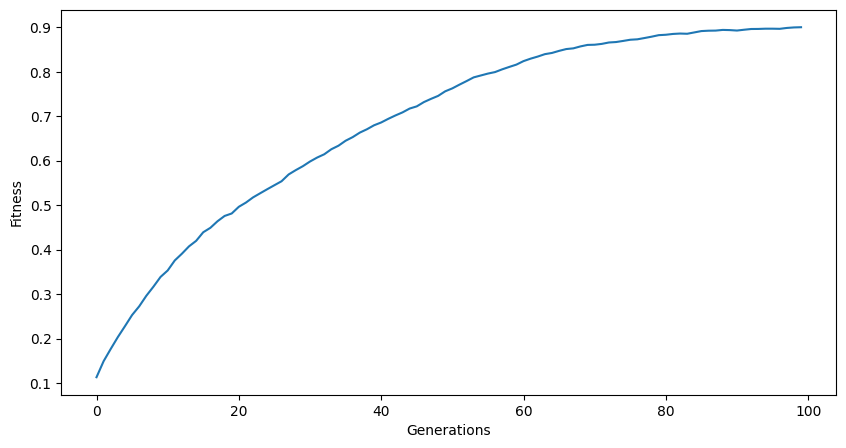

In [16]:
plt.figure(figsize=(10,5))
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.plot(pop_fit)

In [17]:
pop.sort(key=lambda x: x.fitness, reverse=True) #sort in place, highest fitness first

In [18]:
pop[0].string

'Helhlo Worl!'